# Forschungsdaten des  Instituts für Deutsche Sprache (IDS)



<a id="0"></a>
## Inhalt

[Zusammenführen der Dataframes](#0.0)

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

3. [Word Clouds](#3)


<a id="0.0"></a>

## Zusammenführen der Dataframes

In [1]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Erstellen der Dataframes aus den gesplitteten Daten
df_1 = pd.read_csv(r'../../data/refined/clarin/ids/ids-records-20240620_10000_refined.csv',
dtype=str,  # Datentyp auf String setzen
low_memory=False)  # Speicheroptimierung ausschalten

df_2 = pd.read_csv(r'../../data/refined/clarin/ids/ids-records-20240620_20000_refined.csv',
dtype=str,  # Datentyp auf String setzen
low_memory=False)  # Speicheroptimierung ausschalten

df_3 = pd.read_csv(r'../../data/refined/clarin/ids/ids-records-20240620_30000_refined.csv',
dtype=str,  # Datentyp auf String setzen
low_memory=False)  # Speicheroptimierung ausschalten

df_4 = pd.read_csv(r'../../data/refined/clarin/ids/ids-records-20240620_40000_refined.csv',
dtype=str,  # Datentyp auf String setzen
low_memory=False)  # Speicheroptimierung ausschalten

df_5 = pd.read_csv(r'../../data/refined/clarin/ids/ids-records-20240620_49891_refined.csv',
dtype=str,  # Datentyp auf String setzen
low_memory=False)  # Speicheroptimierung ausschalten

In [3]:
# Zusammenführen der Dataframes zum 1. Dataframe
data_ids = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0, ignore_index=True)


In [4]:
# Erstellen des 2. Dataframes (recordweise gruppiert)

data_ids_grouped = data_ids.copy()

# neue unique record id erstellen, da duplicate vorhanden sind in record id
data_ids_grouped['new record id'] = data_ids_grouped['record id'] + '_' + data_ids.index.astype(str)
data_ids_grouped['new record id'] = data_ids_grouped['new record id'].ffill()  # neue record id auffüllen


# Gruppieren und joinen der Daten nach new record id
data_ids_grouped = data_ids_grouped.groupby('new record id').agg({
    'datestamp': 'first',  
    'identifier': lambda x: '; '.join(x.dropna().unique()), 
    'title': lambda x: '; '.join(x.dropna().unique()), 
    'subject': lambda x: '; '.join(x.dropna().unique()),  
    'language': lambda x: '; '.join(x.dropna().unique()), 
    'creator': lambda x: '; '.join(x.dropna().unique()), 
    'type': lambda x: '; '.join(x.dropna().unique()),  
    'type - dcmi recommendation': lambda x: '; '.join(x.dropna().unique()),  
    'format': lambda x: '; '.join(x.dropna().unique()),  
    'format - mediatype': lambda x: '; '.join(x.dropna().unique()),  
    'format - subtype': lambda x: '; '.join(x.dropna().unique()), 
    'description': lambda x: '; '.join(x.dropna().unique()), 
    'coverage': lambda x: '; '.join(x.dropna().unique()),
    'relation': lambda x: '; '.join(x.dropna().unique()),
    'publisher': lambda x: '; '.join(x.dropna().unique()),  
    'rights': lambda x: '; '.join(x.dropna().unique()),
    'date': lambda x: '; '.join(x.dropna().unique()),  
    'source': lambda x: '; '.join(x.dropna().unique()),
    'record id': lambda x: '; '.join(x.dropna().unique()) 
}).reset_index(drop=True)


data_ids_grouped.fillna('NA', inplace=True)  # NaN durch NA ersetzen

data_ids_grouped[['date', 'datestamp']] = data_ids_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_ids[['date', 'datestamp']] = data_ids[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_ids_grouped.replace('', 'NA', inplace=True)  # leere Werte durch NA ersetzen



In [5]:
data_ids_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49891 entries, 0 to 49890
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   49891 non-null  datetime64[ns, UTC]
 1   identifier                  49891 non-null  object             
 2   title                       49891 non-null  object             
 3   subject                     49891 non-null  object             
 4   language                    49891 non-null  object             
 5   creator                     49891 non-null  object             
 6   type                        49891 non-null  object             
 7   type - dcmi recommendation  49891 non-null  object             
 8   format                      49891 non-null  object             
 9   format - mediatype          49891 non-null  object             
 10  format - subtype            49891 non-null  object        

                        column  count   type
12                    coverage   2361  valid
5                      creator   3032  valid
16                        date      1  valid
0                    datestamp  49891  valid
11                 description   5155  valid
8                       format   7210  valid
9           format - mediatype   7210  valid
10            format - subtype   4966  valid
1                   identifier  49891  valid
4                     language   7159  valid
14                   publisher   1525  valid
18                   record id  49891  valid
13                    relation   2257  valid
15                      rights     47  valid
17                      source   1431  valid
3                      subject   3009  valid
2                        title  41037  valid
6                         type   7317  valid
7   type - dcmi recommendation   7317  valid


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


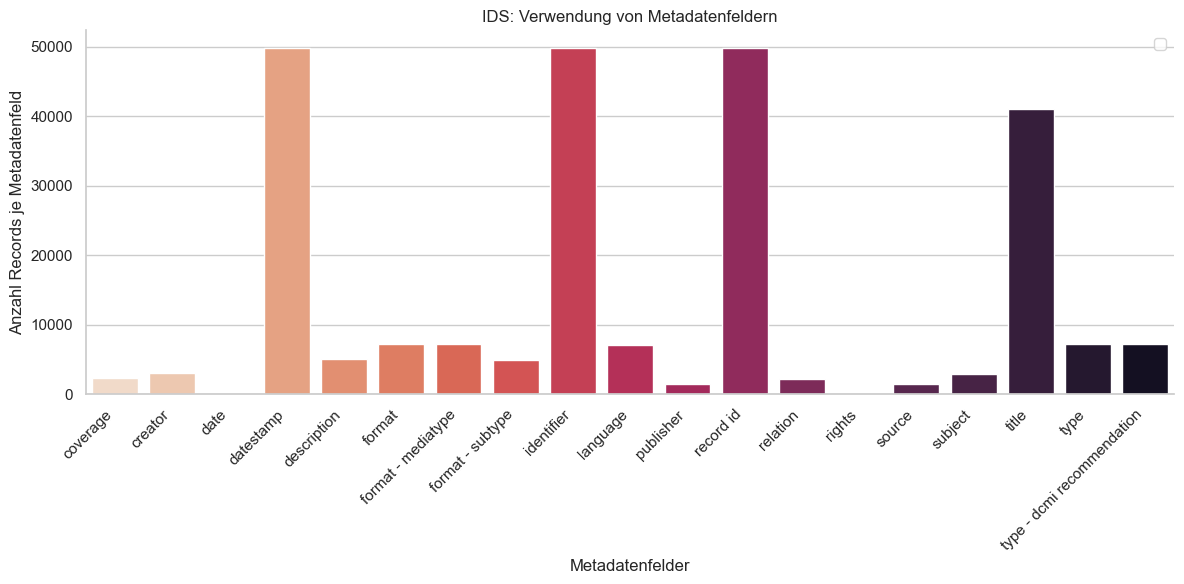

In [6]:
# Erstellen eines DataFrames zur Zusammenfassung der gültigen Einträge für jedes Metadatenfeld
metadata_usage = pd.DataFrame(columns=['column', 'count', 'type'])

# Verwendung des gruppierten Dataframes
for column in data_ids_grouped.columns:
    # Zählen gültiger Werte
    valid_count = data_ids_grouped[column][data_ids_grouped[column] != 'NA'].count()

    # Erstellen eines temporären DataFrames
    valid_row = pd.DataFrame({'column': [column], 'count': [valid_count], 'type': ['valid']})

    # Verkettung der Zeilen
    metadata_usage = pd.concat([metadata_usage, valid_row], ignore_index=True)

metadata_usage = metadata_usage.sort_values(by='column')

# Ausgabe zur Prüfung von metadata_usage
print(metadata_usage)

# Berechnen der maximalen Anzahl der Records mit 'new record id'
max_record_count = data_ids_grouped['record id'].nunique()
sns.set_theme(style='whitegrid')
# Erstellen des Plots mit sortierten Daten
sns.catplot(data=metadata_usage, x='column', y='count', kind='bar', height=6, aspect=2, hue='column', palette='rocket_r')



# Plot-Beschriftungen und Titel anpassen
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metadatenfelder')
plt.ylabel('Anzahl Records je Metadatenfeld')
plt.title('IDS: Verwendung von Metadatenfeldern')
plt.legend()
plt.tight_layout()
plt.savefig("IDS_Verwendung_von_Metadatenfeldern.png", dpi=600)

plt.show()




<a id="1"></a>

## 1. Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [7]:
'Zeilenweiser Dataframe: Info zu Spalten und Datentypen'

data_ids.info() # Spaltennamen, Datentypen und fehlende Werte anzeigen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162068 entries, 0 to 162067
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   49891 non-null  datetime64[ns, UTC]
 1   identifier                  85972 non-null  object             
 2   title                       41084 non-null  object             
 3   subject                     64064 non-null  object             
 4   language                    12823 non-null  object             
 5   record id                   49891 non-null  object             
 6   creator                     7573 non-null   object             
 7   type                        16325 non-null  object             
 8   type - dcmi recommendation  7318 non-null   object             
 9   format                      15831 non-null  object             
 10  format - mediatype          15831 non-null  object      

In [8]:
unique_record_ids = data_ids['record id'].nunique()
print(f"Number of unique 'record id' values before grouping: {unique_record_ids}")


Number of unique 'record id' values before grouping: 39891


In [9]:
unique_record_ids_grouped = data_ids_grouped['record id'].nunique()
print(f"Number of unique 'record id' values after grouping: {unique_record_ids_grouped}")


Number of unique 'record id' values after grouping: 39891


In [10]:
duplicate_record_ids = data_ids[data_ids.duplicated('record id', keep=False)]
print(f"Number of duplicate 'record id' values: {len(duplicate_record_ids)}")


Number of duplicate 'record id' values: 132177


In [11]:
print(f"Number of rows in df_1: {len(df_1)}")
print(f"Number of rows in df_2: {len(df_2)}")
print(f"Number of rows in df_3: {len(df_3)}")
print(f"Number of rows in df_4: {len(df_4)}")
print(f"Number of rows in df_5: {len(df_5)}")
print(f"Number of rows in concatenated dataframe: {len(data_ids)}")


Number of rows in df_1: 20176
Number of rows in df_2: 82634
Number of rows in df_3: 25378
Number of rows in df_4: 20176
Number of rows in df_5: 13704
Number of rows in concatenated dataframe: 162068


In [12]:
'Zeilenweiser Dataframe: Erste 5 Zeilen'

data_ids.head() 

,datestamp,identifier,title,subject,language,record id,creator,type,type - dcmi recommendation,format,format - mediatype,format - subtype,description,coverage,relation,publisher,rights,date,record - header - setSpec,source
0,2021-01-12 16:46:46+00:00,clarin-ids:AD--4.AD--_E_00020.cmdi,Monash Corpus of Australian German,NaN,NaN,oai:repos.ids-mannheim.de:clarin-ids:AD--4.AD-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,NaT,http://hdl.handle.net/10932/00-03BC-733B-9700-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,2021-01-12 16:46:46+00:00,clarin-ids:AD--4.AD--_E_00021.cmdi,Monash Corpus of Australian German,NaN,NaN,oai:repos.ids-mannheim.de:clarin-ids:AD--4.AD-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,NaT,http://hdl.handle.net/10932/00-03BC-733B-A810-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,2021-01-12 16:46:46+00:00,clarin-ids:AD--4.AD--_E_00022.cmdi,Monash Corpus of Australian German,NaN,NaN,oai:repos.ids-mannheim.de:clarin-ids:AD--4.AD-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [13]:
'Zeilenweiser Dataframe: Statistische Kennzahlen'



'Zeilenweiser Dataframe: Statistische Kennzahlen'

In [14]:
'Recordweiser Dataframe: Info zu Spalten und Datentypen'

data_ids_grouped.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49891 entries, 0 to 49890
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   49891 non-null  datetime64[ns, UTC]
 1   identifier                  49891 non-null  object             
 2   title                       49891 non-null  object             
 3   subject                     49891 non-null  object             
 4   language                    49891 non-null  object             
 5   creator                     49891 non-null  object             
 6   type                        49891 non-null  object             
 7   type - dcmi recommendation  49891 non-null  object             
 8   format                      49891 non-null  object             
 9   format - mediatype          49891 non-null  object             
 10  format - subtype            49891 non-null  object        

In [15]:
'recordweiser Dataframe: Erste 5 Zeilen'

data_ids_grouped.head(5) 

,datestamp,identifier,title,subject,language,creator,type,type - dcmi recommendation,format,format - mediatype,format - subtype,description,coverage,relation,publisher,rights,date,source,record id
0,2021-01-12 16:46:46+00:00,clarin-ids:AD--4.AD--.cmdi; http://hdl.handle....,Monash Corpus of Australian German,gesprochene deutsche Sprache; Dialekt; Sprachi...,deu; eng,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaT,NA,oai:repos.ids-mannheim.de:clarin-ids:AD--4.AD-...
1,2021-01-12 16:46:46+00:00,clarin-ids:AD--4.AD--.cmdi; http://hdl.handle....,Monash Corpus of Australian German,gesprochene deutsche Sprache; Dialekt; Sprachi...,deu; eng,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaT,NA,oai:repos.ids-mannheim.de:clarin-ids:AD--4.AD-...
2,2021-01-12 16:46:46+00:00,clarin-ids:AD--4.AD--_E_00001.cmdi; http://hdl...,Monash Corpus of Australian German,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaT,NA,oai:repos.ids-mannheim.de:clarin-ids:AD--4.AD-...
3,2021-01-12 16:46:46+00:00,clarin-ids:AD--4.AD--_E_00001.cmdi; http://hdl...,Monash Corpus of Australian German,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaT,NA,oai:repos.ids-mannheim.de:clarin-ids:AD--4.AD-...
4,2021-01-12 16:46:46+00:00,clarin-ids:AD--4.AD--_E_00002.cmdi; http://hdl...,Monash Corpus of Australian German,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NaT,NA,oai:repos.ids-mannheim.de:clarin-ids:AD--4.AD-...


In [16]:
'Recordweiser Dataframe: Statistische Kennzahlen'
data_ids_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49891 entries, 0 to 49890
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   49891 non-null  datetime64[ns, UTC]
 1   identifier                  49891 non-null  object             
 2   title                       49891 non-null  object             
 3   subject                     49891 non-null  object             
 4   language                    49891 non-null  object             
 5   creator                     49891 non-null  object             
 6   type                        49891 non-null  object             
 7   type - dcmi recommendation  49891 non-null  object             
 8   format                      49891 non-null  object             
 9   format - mediatype          49891 non-null  object             
 10  format - subtype            49891 non-null  object        

In [17]:
'Verwendete Farbpalette'

sns.color_palette('rocket_r', 12)

[(0.9698028, 0.80981139, 0.70252255),
 (0.96479861, 0.68910113, 0.53756026),
 (0.96077819, 0.55997184, 0.39941173),
 (0.95001704, 0.42771398, 0.29244728),
 (0.91978131, 0.27526191, 0.24245973),
 (0.84335441, 0.14556683, 0.28480819),
 (0.73669146, 0.08704683, 0.33543669),
 (0.60444226, 0.10573912, 0.35820487),
 (0.47114798, 0.12098721, 0.34787978),
 (0.34940101, 0.11863987, 0.3138355),
 (0.22741085, 0.10140876, 0.25340813),
 (0.1125315, 0.06742194, 0.17414848)]

In [18]:
rocket_palette = sns.color_palette('rocket_r', 12, as_cmap=False)
rocket_hex = rocket_palette.as_hex()
print(rocket_hex)

['#f7cfb3', '#f6b089', '#f58f66', '#f26d4b', '#eb463e', '#d72549', '#bc1656', '#9a1b5b', '#781f59', '#591e50', '#3a1a41', '#1d112c']


<a id="2"></a>
## 2. Univariate Plots

[Zurück zum Anfang](#0)




### Publikation von Forschungsdaten im Zeitverlauf
[Zurück zum Anfang](#0)

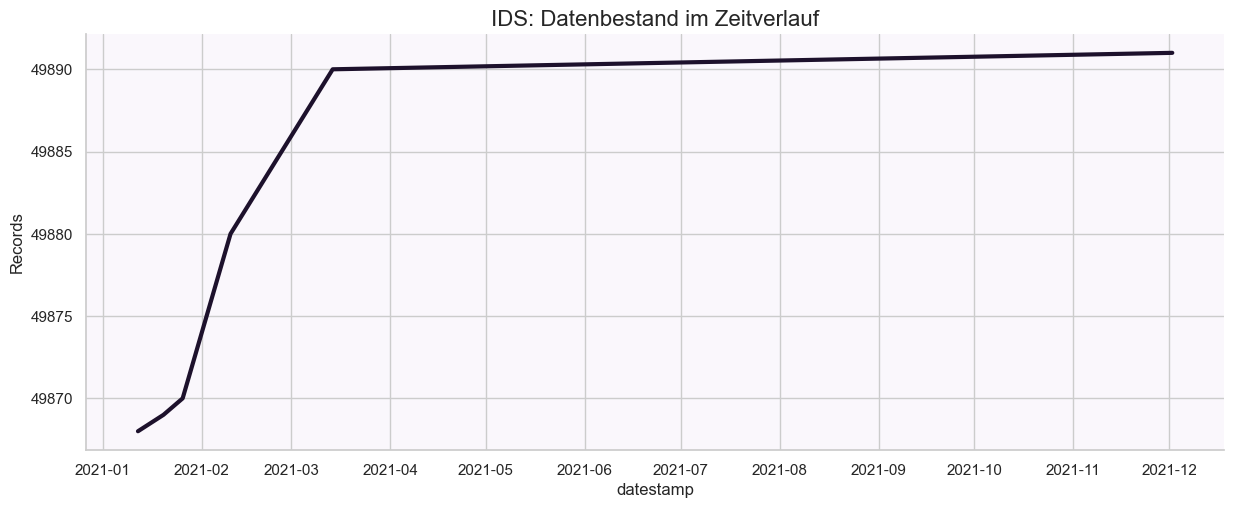

frühster Datestamp: 2021-01-12 ; spätester Datestamp: 2021-12-02


In [19]:
daily_counts = data_ids.groupby(data_ids['datestamp'].dt.date).size().reset_index(name='count')# Gruppieren und Zählen der Records nach Datum
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe


sns.set_style('whitegrid', {'axes.facecolor':'#faf7fc', 'figure.facecolor': 'white' }) # Style des Plots anpassen

# Plot der kumulativen Summe der Records über die Zeit
sns.relplot(daily_counts, x='datestamp', y='cumulative_count', kind='line', aspect=2.5, errorbar = None, color='#1d112c', linewidth=3)


plt.title('IDS: Datenbestand im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Records', fontsize=12)
# plt.xticks(rotation=45) 
plt.savefig("IDS_datestamp_line_cum.png", dpi=600, bbox_inches='tight')
plt.show()

print('frühster Datestamp:', data_ids['datestamp'].min().date(), '; spätester Datestamp:', data_ids['datestamp'].max().date())

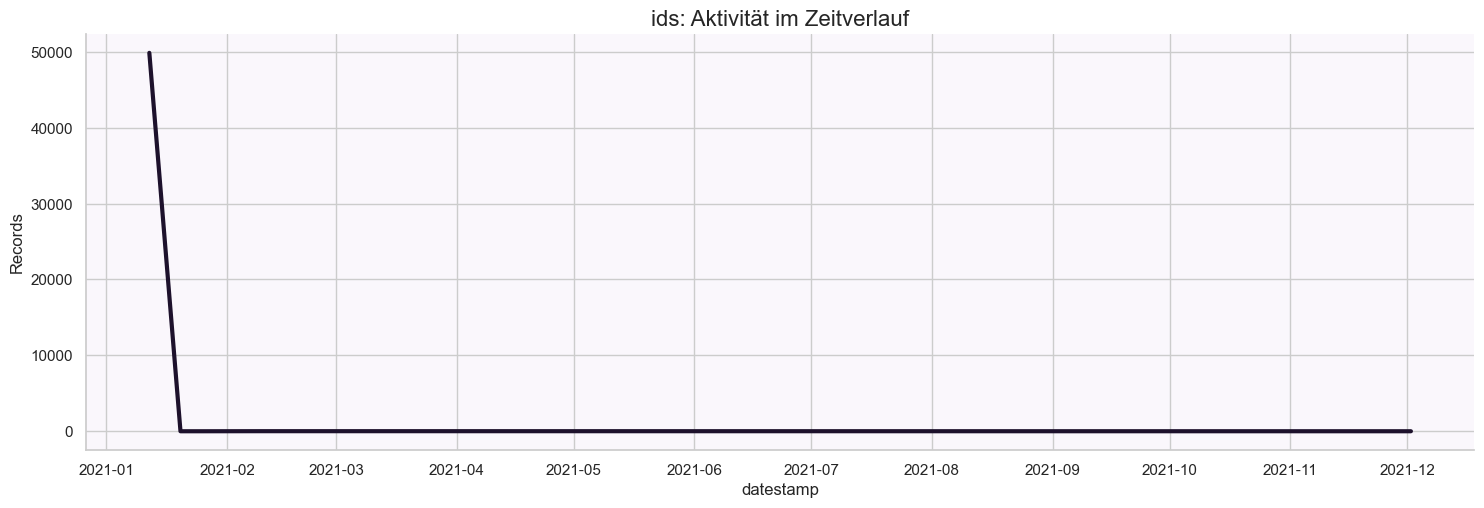

frühster Datestamp: 2021-01-12 ; spätester Datestamp: 2021-12-02


In [20]:

# verwendet daily_counts = gruppierte Records nach datestamp

sns.set_style('whitegrid', {'axes.facecolor':'#faf7fc', 'figure.facecolor': 'white' }) # Style des Plots anpassen

sns.relplot(data=daily_counts, x='datestamp', y='count', kind='line', color='#1d112c', aspect=3, linewidth=3) 

plt.title('ids: Aktivität im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Records', fontsize=12)
plt.show()

print('frühster Datestamp:', data_ids['datestamp'].min().date(), '; spätester Datestamp:', data_ids['datestamp'].max().date())

### Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

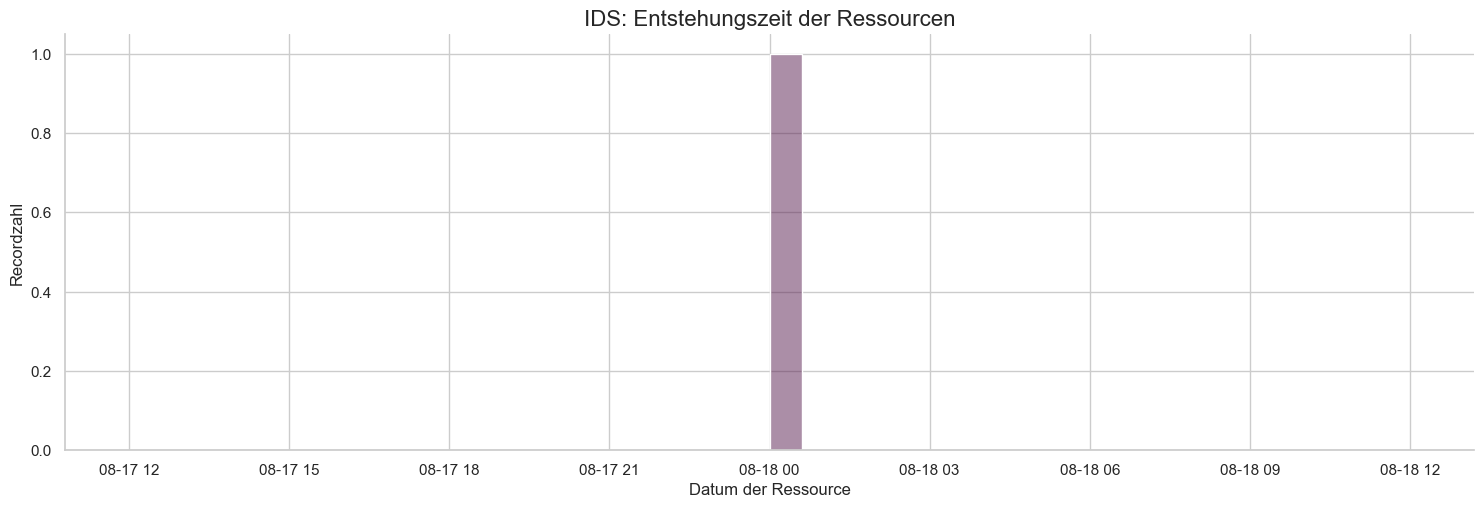

frühstes Datum: 2010-08-18 ; spätestes Datum: 2010-08-18


In [21]:
sns.set_theme(style='whitegrid') # seaborn-Design setzen
sns.displot(data_ids_grouped, x='date', bins=40, kde=-True, color = '#591e50', aspect=3) # Erscheinungszeitpunkt der Forschungsdaten in absolten Zahlen

plt.title('IDS: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('Datum der Ressource', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.show()

print('frühstes Datum:', data_ids['date'].min().date(), '; spätestes Datum:', data_ids['date'].max().date())


### Verteilung der Urheberschaft

[Zurück zum Anfang](#0)

In [22]:
'Zu viele Werte'

# sns.set_theme() #Wiederherstellen der Defaulteinstellungen

# # Ordnen der Werte nach Häufigkeit
# order = data_ids['creator'].value_counts().index
# # Konvertieren der Daten in kategorische Variablen
# data_ids['creator'] = pd.Categorical(data_ids['creator'], categories=order, ordered=True)

# sns.set_style('whitegrid')
# sns.displot(data_ids, y = 'creator', color='#781f59', aspect = 2, stat='percent')

# plt.xticks(rotation=90)
# plt.title('ids: Verteilung der Urheberschaft', fontsize=16)
# plt.xlabel('Prozent', fontsize=16)
# plt.ylabel('creator', fontsize=16)
# plt.show()

'Zu viele Werte'

In [23]:

'Zu viele Werte'

# order = data_ids['creator'].value_counts().index
# # Konvertieren der Daten in kategorische Variablen
# data_ids['creator'] = pd.Categorical(data_ids['creator'], categories=order, ordered=True)
# data_ids_creator_flt = data_ids[(data_ids['creator'] != 'COALA') & (data_ids['creator'] != 'Bernhard Jackl')]


# sns.set_style('whitegrid')
# sns.displot(data_ids_creator_flt, y = 'creator', color='#65ad90', aspect = 2)
# plt.xticks(rotation=90)
# plt.title('IDS: Verteilung der Urheberschaft < 10 %', fontsize=16)
# plt.xlabel('Prozent', fontsize=16)
# plt.ylabel('creator', fontsize=16)
# plt.show()

'Zu viele Werte'


### Sprachverteilung der Forschungsdaten

[Zurück zum Anfang](#0)

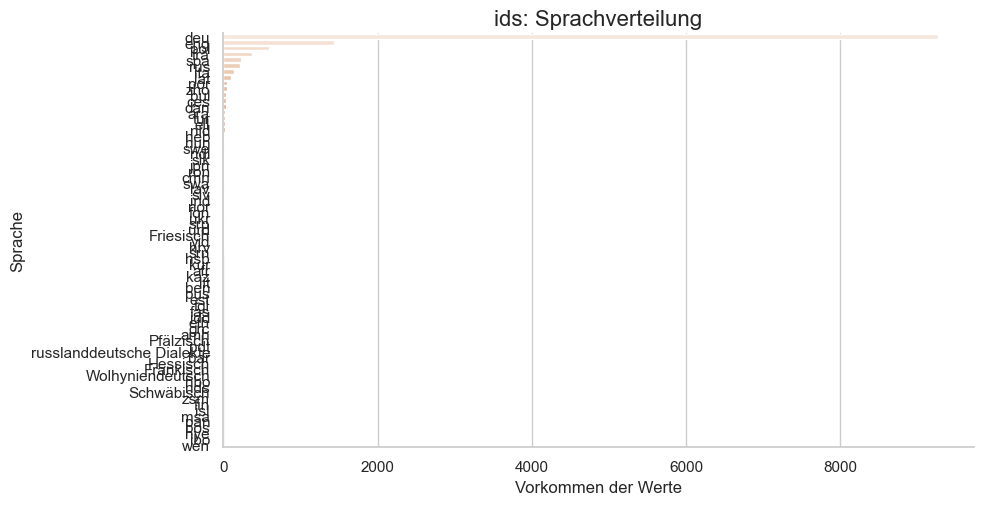

In [24]:
# Reihenfolge der Sprachen festlegen
order = data_ids['language'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_ids['language'] = pd.Categorical(data_ids['language'], categories=order, ordered=True)

sns.catplot(data_ids, y = 'language', kind = 'count', aspect = 2, hue = 'language', palette = 'rocket_r', legend=False)

plt.title('ids: Sprachverteilung', fontsize=16)
plt.ylabel('Sprache', fontsize=12)
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.show()

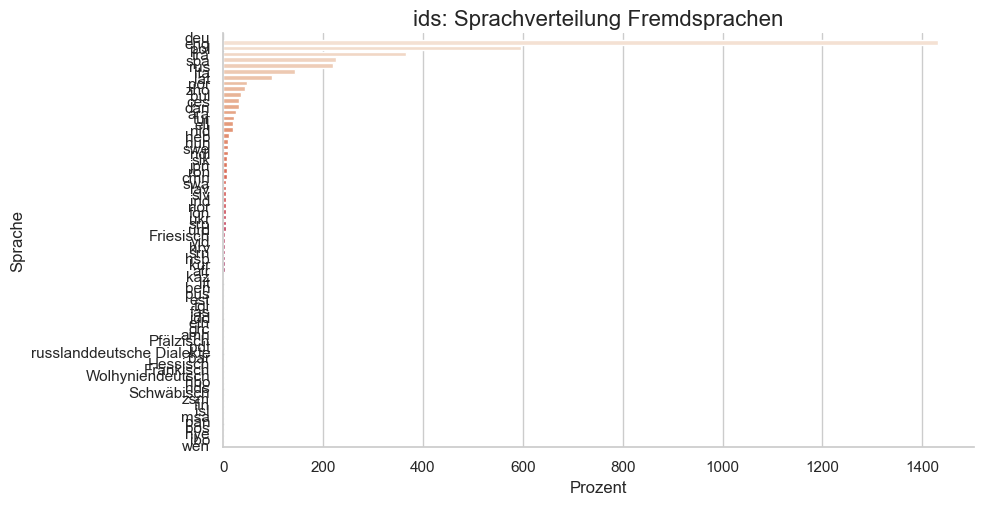

In [25]:
'Sprachverteilung ohne deu'

# Reihenfolge der Sprachen festlegen
order = data_ids['language'].value_counts().index 

# Konvertieren der Daten in kategorische Variablen
data_ids['language'] = pd.Categorical(data_ids['language'], categories=order, ordered=True)

data_ids_lang_flt = data_ids[(data_ids['language'] != 'deu')] # Filtern der Sprache 'deu'

sns.catplot(data_ids_lang_flt, y = 'language', kind='count', aspect = 2, hue = 'language', palette = 'rocket_r', legend=False)

plt.title('ids: Sprachverteilung Fremdsprachen', fontsize=16)
plt.xlabel('Prozent', fontsize=12)
plt.ylabel('Sprache', fontsize=12)
plt.show()

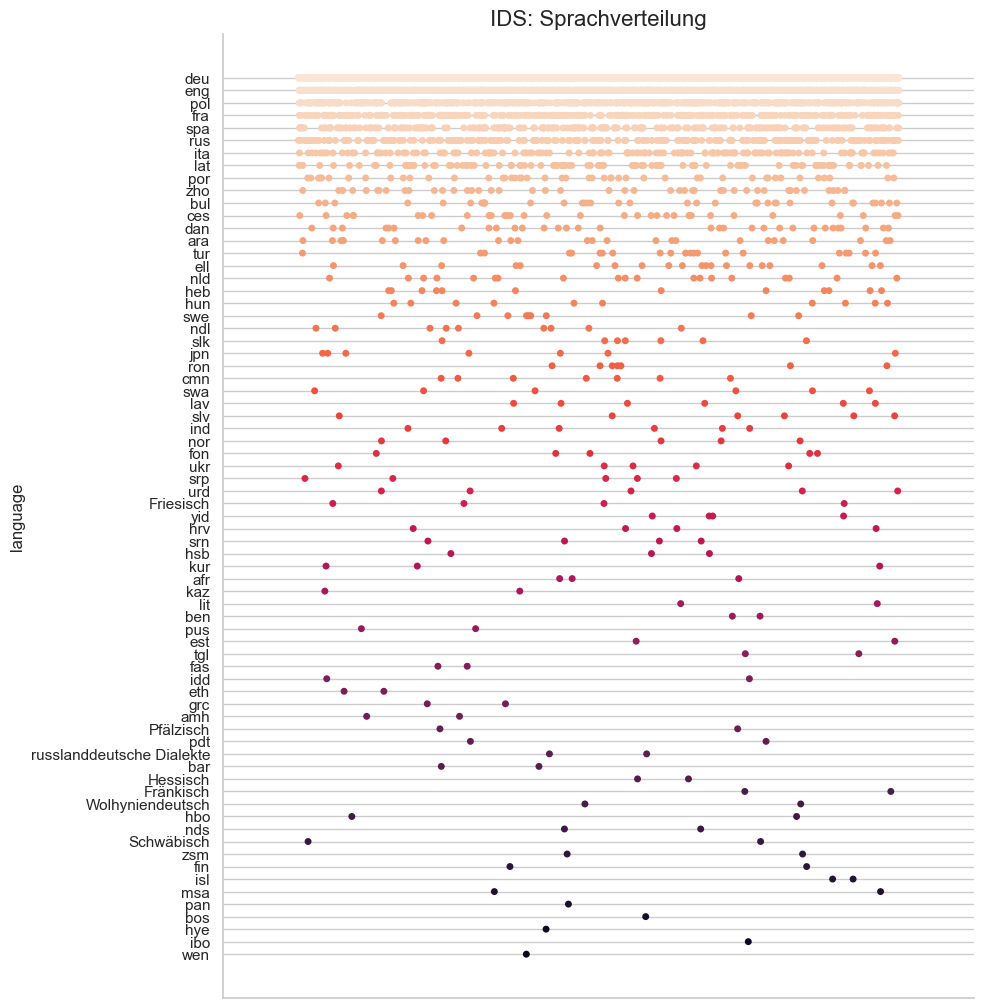

In [38]:
'Scatterplot: Verteilung der Sprachen'

# Reihenfolge der Werte festlegen
order = data_ids['language'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_ids['language'] = pd.Categorical(data_ids['language'], categories=order, ordered=True)


sns.catplot(data_ids, y = 'language', aspect = 1, height=10, hue = 'language', palette="rocket_r", jitter=0.4, legend=False) # Sprachverteilung mit erhöhtem Jitter

plt.title('IDS: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)
plt.savefig("IDS_language_scatter.png", dpi=600, bbox_inches='tight')
plt.show()


### Verteilung der Publisher

[Zurück zum Anfang](#0)

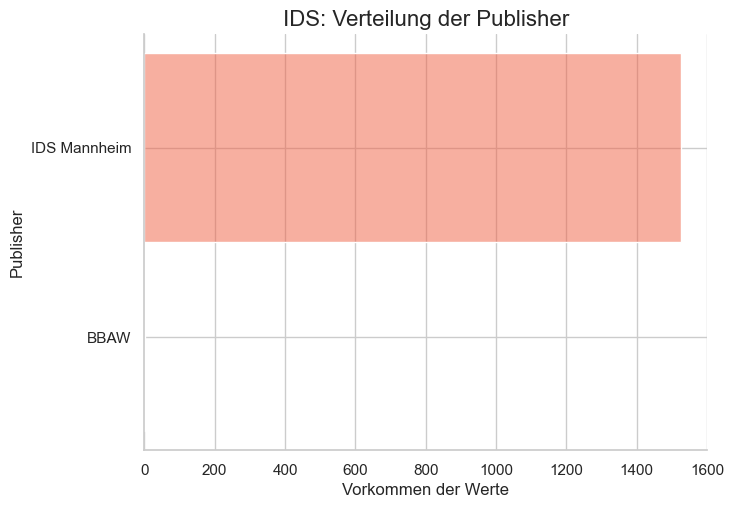

In [41]:
# Reihenfolge der Werte festlegen
order = data_ids['publisher'].value_counts().index 

# Konvertieren der Daten in kategorische Variablen
data_ids['publisher'] = pd.Categorical(data_ids['publisher'], categories=order, ordered=True)

sns.displot(data_ids, y = 'publisher', aspect = 1.5, hue='publisher', palette="rocket_r", legend=False)


plt.title('IDS: Verteilung der Publisher', fontsize=16)
plt.xlabel('Vorkommen der Werte', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()


### Verteilung des Ressourchentyps

[Zurück zum Anfang](#0)

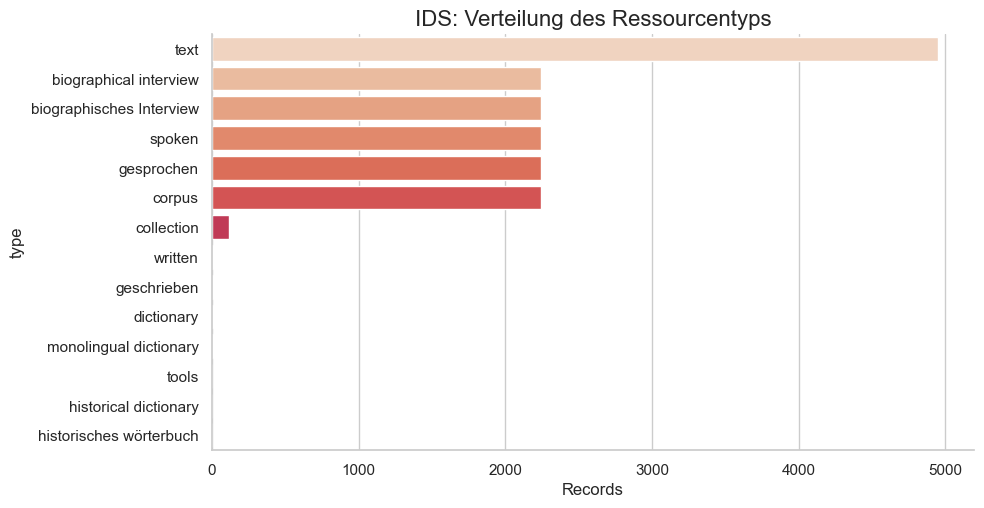

In [28]:

'Verteilung des Ressourcentyps wie vom ids angegeben'

order = data_ids['type'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_ids['type'] = pd.Categorical(data_ids['type'], categories=order, ordered=True)

sns.catplot(data_ids, y = 'type', kind = 'count', aspect = 2, hue = 'type', palette='rocket_r', legend=False)

plt.title('IDS: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('Records', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.savefig("IDS_typ_hist.png", dpi=600, bbox_inches='tight')
plt.show()


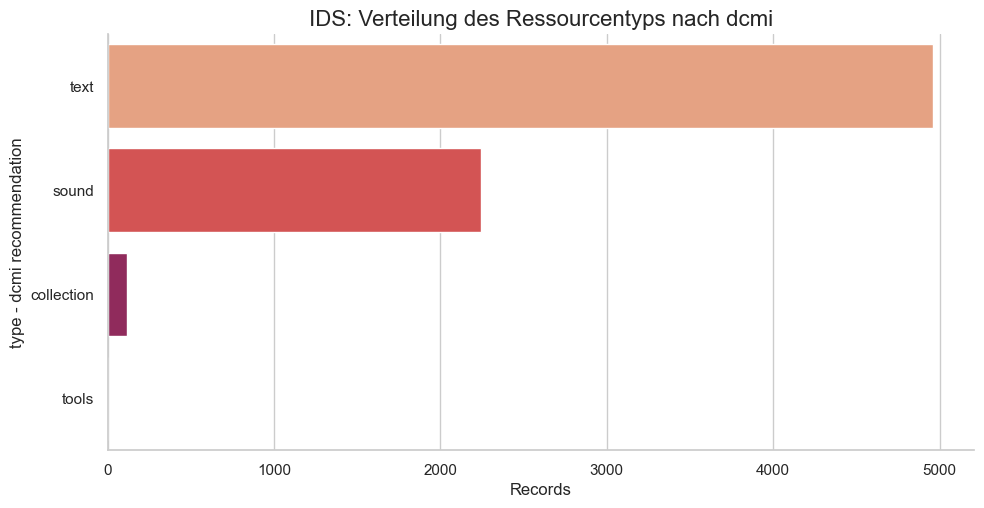

In [29]:

'Verteilung des Ressourcentyps nach dcmi-Empfehlung'

order = data_ids['type - dcmi recommendation'].value_counts().index
# Werte Ordnen
data_ids['type - dcmi recommendation'] = pd.Categorical(data_ids['type - dcmi recommendation'], categories=order, ordered=True)

sns.catplot(data_ids, y = 'type - dcmi recommendation', kind = 'count', aspect = 2, hue = 'type - dcmi recommendation', palette='rocket_r', legend=False)

plt.title('IDS: Verteilung des Ressourcentyps nach dcmi', fontsize=16)
plt.xlabel('Records', fontsize=12)
plt.ylabel('type - dcmi recommendation', fontsize=12)
plt.savefig("IDS_typ_dcmi_hist.png", dpi=600, bbox_inches='tight')
plt.show()



### Verteilung des Ressourcenformats

[Zurück zum Anfang](#0)



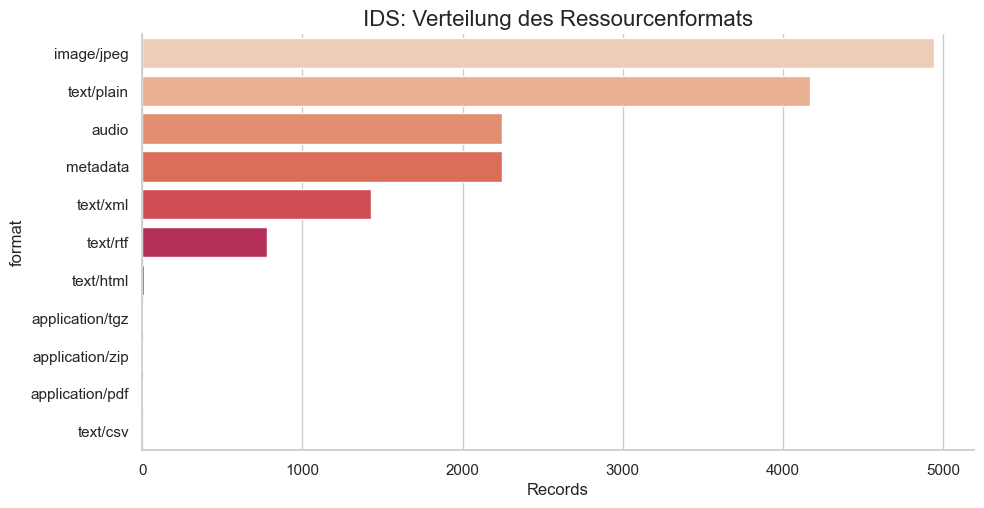

In [30]:
order = data_ids['format'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_ids['format'] = pd.Categorical(data_ids['format'], categories=order, ordered=True)

sns.catplot(data_ids, y = 'format', kind = 'count', aspect = 2, hue = 'format', palette='rocket_r', legend=False)

plt.title('IDS: Verteilung des Ressourcenformats', fontsize=16)
plt.xlabel('Records', fontsize=12)
plt.ylabel('format', fontsize=12)
plt.savefig("IDS_format_hist.png", dpi=600, bbox_inches='tight')
plt.show()

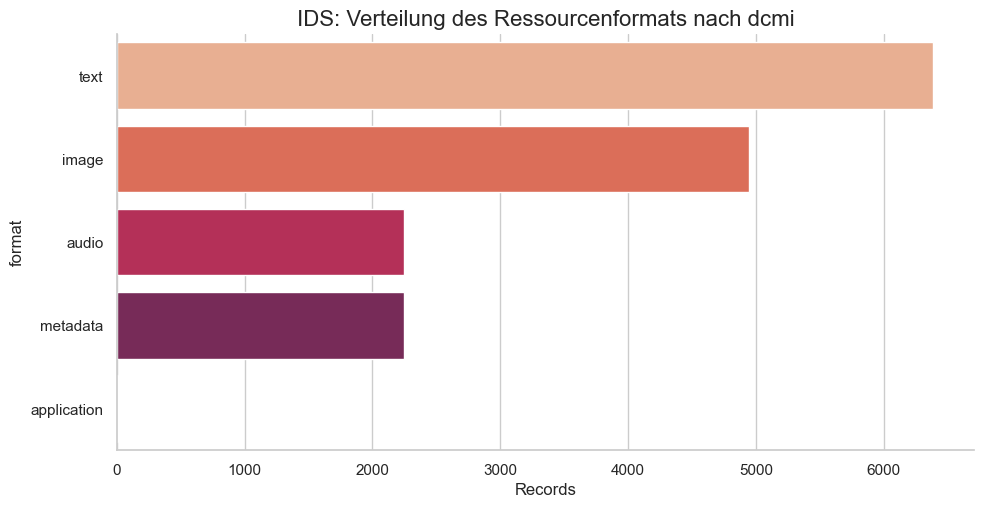

In [31]:
order = data_ids['format - mediatype'].value_counts().index
# Werte ordnen
data_ids['format - mediatype'] = pd.Categorical(data_ids['format - mediatype'], categories=order, ordered=True)

sns.catplot(data_ids, y = 'format - mediatype', kind = 'count', aspect = 2, hue = 'format - mediatype', palette='rocket_r', legend=False)

plt.title('IDS: Verteilung des Ressourcenformats nach dcmi', fontsize=16)
plt.xlabel('Records', fontsize=12)
plt.ylabel('format', fontsize=12)
plt.savefig("IDS_format_mediatype_hist.png", dpi=600, bbox_inches='tight')
plt.show()

### Verteilung des Geltungsbereichs

[Zurück zum Anfang](#0)

In [32]:
data_ids_grouped['coverage'].value_counts()

coverage
NA           47530
1890–1984     2244
–2017           12
–2015           10
–2013            7
             ...  
1917             1
1913             1
1920             1
1922             1
1838             1
Name: count, Length: 66, dtype: int64

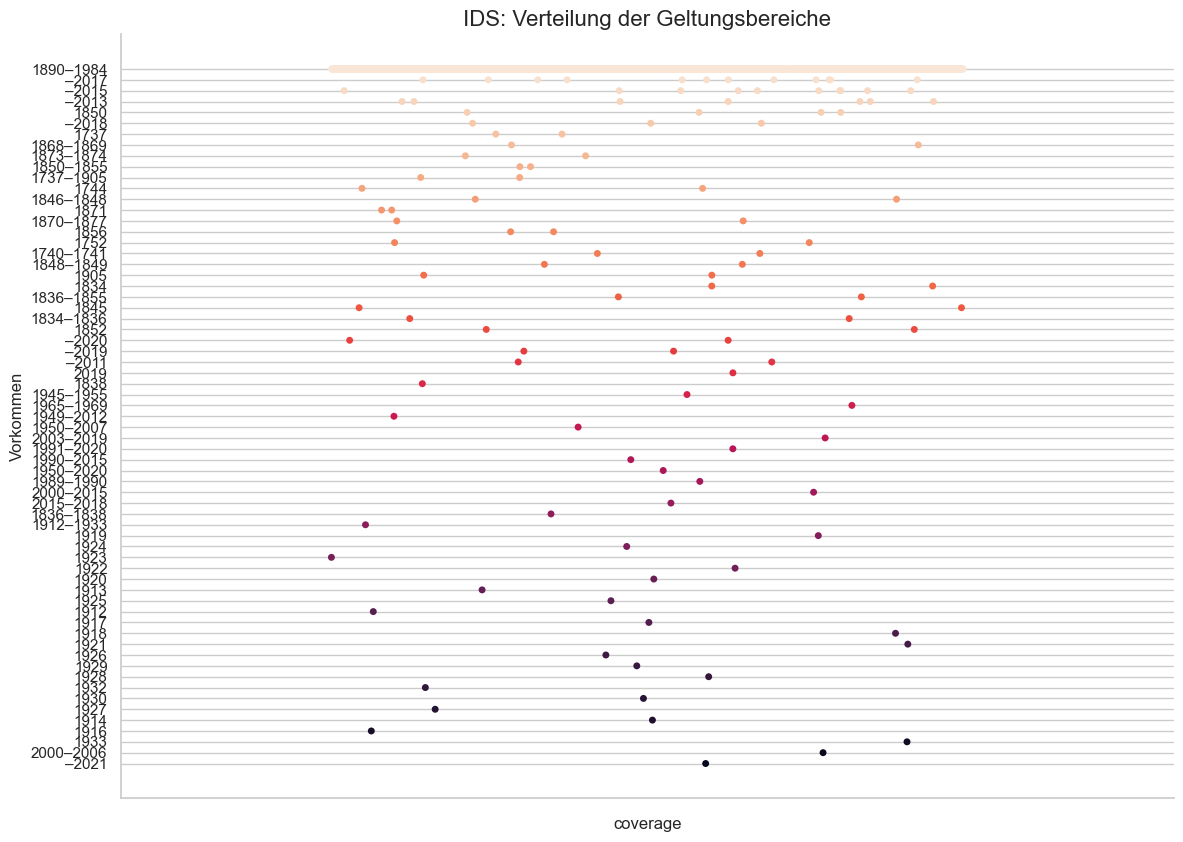

In [33]:
# Reihenfolge der Werte festlegen
order = data_ids['coverage'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_ids['coverage'] = pd.Categorical(data_ids['coverage'], categories=order, ordered=True)

sns.set_style('whitegrid')
sns.catplot(data_ids, y = 'coverage', hue='coverage', palette="rocket_r", height = 8, aspect=1.5, jitter=0.3, legend=False) 

plt.title('IDS: Verteilung der Geltungsbereiche', fontsize=16)
plt.xlabel('coverage', fontsize=12)
#plt.yticks(rotation=45, ha='right')
plt.ylabel('Vorkommen', fontsize=12)
plt.savefig("IDS_Verteilung_coverage_hist.png", dpi=600, bbox_inches='tight')
plt.show()

### Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

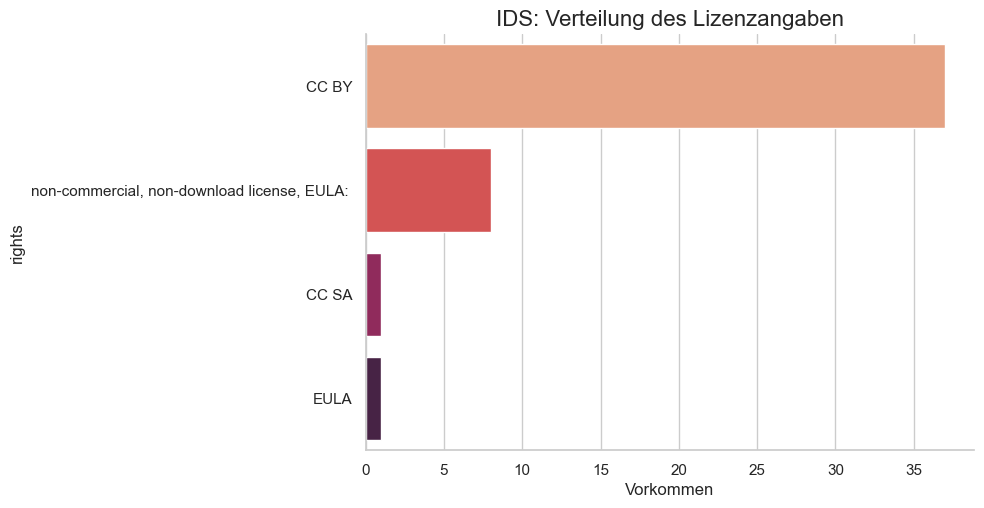

In [40]:

'Verteilung der Lizenzangaben'

order = data_ids['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_ids['rights'] = pd.Categorical(data_ids['rights'], categories=order, ordered=True)

sns.catplot(data_ids, y = 'rights', kind = 'count', aspect = 2, hue = 'rights', palette='rocket_r', legend=False)

plt.title('IDS: Verteilung des Lizenzangaben', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('rights', fontsize=12)
plt.savefig("IDS_rights_cat.png", dpi=600, bbox_inches='tight')
plt.show()

<a id="3"></a>
## 3 Word Clouds
[Zurück zum Anfang](#0)




### Häufige Titelbegriffe

[Zurück zum Anfang](#0)

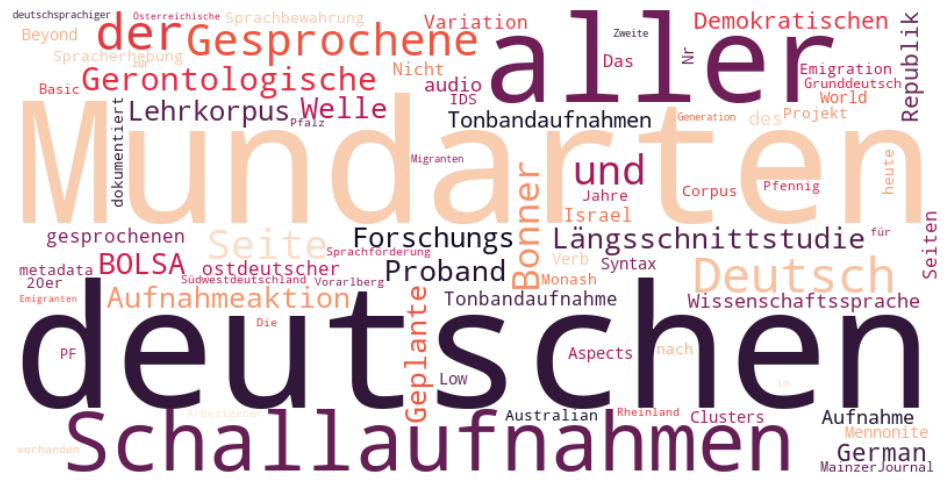

{'Mundarten': 1.0, 'deutschen': 0.9956495855657829, 'aller': 0.8721436094701653, 'Schallaufnahmen': 0.872052021797866, 'der': 0.1974172276411595, 'Deutsch': 0.18418280899390943, 'Gesprochene': 0.1479598845995329, 'und': 0.12281906855337271, 'Seite': 0.12172001648578101, 'Bonner': 0.10276136831982415, 'Gerontologische': 0.10276136831982415, 'Längsschnittstudie': 0.10276136831982415, 'BOLSA': 0.10276136831982415, 'Proband': 0.1027155744836745, 'Welle': 0.1027155744836745, 'Geplante': 0.09928103677245043, 'Aufnahmeaktion': 0.09928103677245043, 'Forschungs': 0.08998488803407062, 'Lehrkorpus': 0.08998488803407062, 'German': 0.0703851261620186, 'Republik': 0.0623712048358291, 'Demokratischen': 0.06108897742363878, 'Tonbandaufnahmen': 0.06104318358748912, 'Wissenschaftssprache': 0.05696753217016989, 'des': 0.05367037596739479, 'Aufnahme': 0.050968539634565185, 'audio': 0.050968539634565185, 'Tonbandaufnahme': 0.04496954709896048, 'ostdeutscher': 0.04496954709896048, 'gesprochenen': 0.04318358

In [34]:
# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_ids["title"].str.cat(sep=' ')

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket_r', max_words=80, collocations=False).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.savefig("IDS_wordcloud_title.png", dpi=600, bbox_inches='tight')
plt.show()

print(wordcloud.words_)




### Beschreibung der Resource

[Zurück zum Anfang](#0)

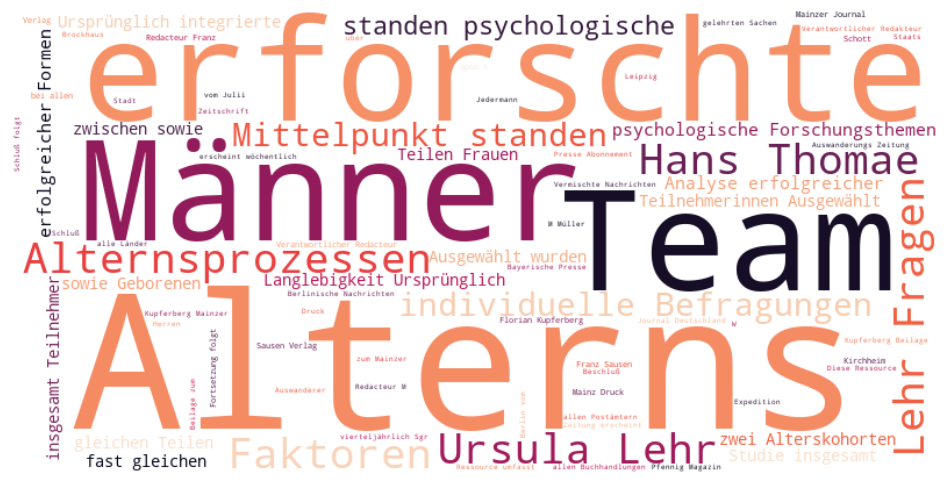

{'Alterns': 1.0, 'Männer': 0.5008912655971479, 'erforschte': 0.5, 'Team': 0.5, 'Alternsprozessen': 0.5, 'Faktoren': 0.5, 'Hans Thomae': 0.5, 'Ursula Lehr': 0.5, 'Lehr Fragen': 0.5, 'individuelle Befragungen': 0.5, 'Mittelpunkt standen': 0.5, 'standen psychologische': 0.5, 'psychologische Forschungsthemen': 0.5, 'Analyse erfolgreicher': 0.5, 'erfolgreicher Formen': 0.5, 'Langlebigkeit Ursprünglich': 0.5, 'Ursprünglich integrierte': 0.5, 'Studie insgesamt': 0.5, 'insgesamt Teilnehmer': 0.5, 'Teilnehmerinnen Ausgewählt': 0.5, 'Ausgewählt wurden': 0.5, 'fast gleichen': 0.5, 'gleichen Teilen': 0.5, 'Teilen Frauen': 0.5, 'zwei Alterskohorten': 0.5, 'zwischen sowie': 0.5, 'sowie Geborenen': 0.5, 'apos s': 0.03453654188948307, 'Verlag': 0.032754010695187165, 'Mainzer Journal': 0.030971479500891266, 'Fortsetzung folgt': 0.0285204991087344, 'Redacteur Franz': 0.027629233511586453, 'Franz Sausen': 0.027629233511586453, 'Sausen Verlag': 0.027629233511586453, 'Mainz Druck': 0.027629233511586453, 'F

In [35]:
# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_ids["description"].str.cat(sep=' ')

stopwords = set([
    'der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'des', 'ein', 'eine', 'einer', 'einen', 'einem', 
    'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'im', 'aus', 'vor', 'nach', 'bzw', 'bis', 'mit', 'ohne', 'um', 'durch', 'für',
    'and', 'about', 'the', 'this', 'that', 'to', 'be', 'by', 'on', 'of', 'an', 'a', 'for', 'from', 'Prof', 'Dr'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket_r', max_words=80, stopwords = stopwords).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()
print(wordcloud.words_)


### Thema der Resource

[Zurück zum Anfang](#0)

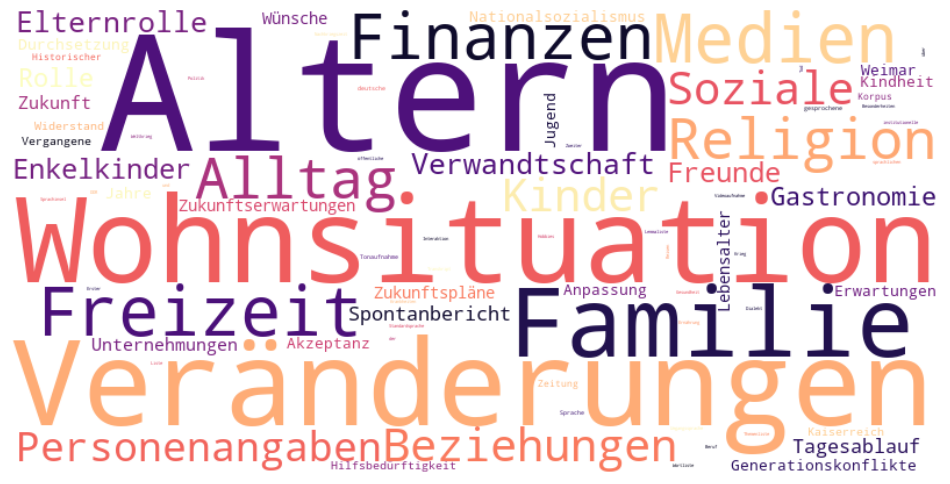

{'Altern': 1.0, 'Wohnsituation': 0.8977777777777778, 'Veränderungen': 0.8924444444444445, 'Familie': 0.8106666666666666, 'Freizeit': 0.8071111111111111, 'Medien': 0.8044444444444444, 'Finanzen': 0.8035555555555556, 'Religion': 0.8035555555555556, 'Alltag': 0.7991111111111111, 'Beziehungen': 0.7991111111111111, 'Soziale': 0.7964444444444444, 'Kinder': 0.7888888888888889, 'Personenangaben': 0.7884444444444444, 'Verwandtschaft': 0.7884444444444444, 'Elternrolle': 0.7871111111111111, 'Enkelkinder': 0.7871111111111111, 'Freunde': 0.7871111111111111, 'Gastronomie': 0.7871111111111111, 'Rolle': 0.7871111111111111, 'Spontanbericht': 0.7871111111111111, 'Tagesablauf': 0.7871111111111111, 'Unternehmungen': 0.7871111111111111, 'Zukunft': 0.7613333333333333, 'Wünsche': 0.6493333333333333, 'Zukunftserwartungen': 0.6466666666666666, 'Zukunftspläne': 0.6466666666666666, 'Lebensalter': 0.6462222222222223, 'Nationalsozialismus': 0.5395555555555556, 'Generationskonflikte': 0.5342222222222223, 'Jugend': 

In [36]:
# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_ids["subject"].str.cat(sep=' ')


# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma', max_words=80, collocations=False).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.savefig("IDS_Wordcloud_subject.png", dpi=600, bbox_inches='tight')
plt.show()

print(wordcloud.words_)

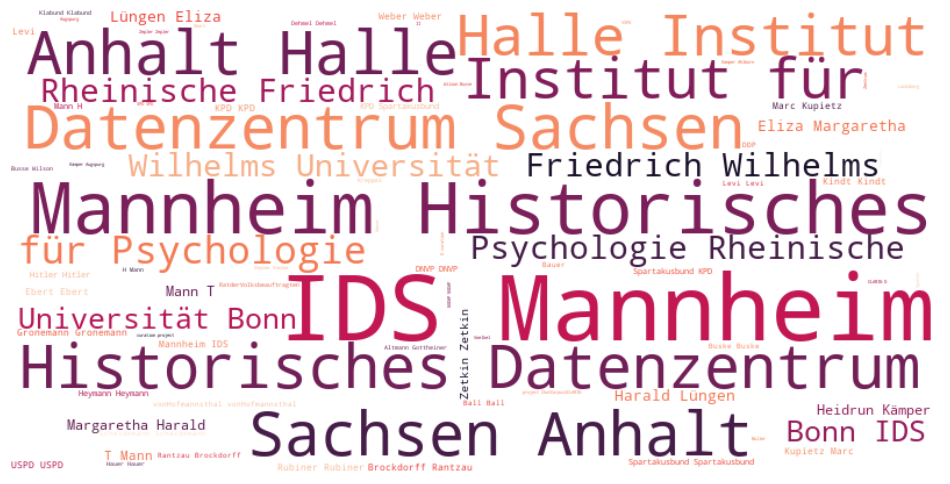

{'IDS Mannheim': 1.0, 'Mannheim Historisches': 0.9955634427684117, 'Historisches Datenzentrum': 0.9955634427684117, 'Datenzentrum Sachsen': 0.9955634427684117, 'Sachsen Anhalt': 0.9955634427684117, 'Anhalt Halle': 0.9955634427684117, 'Halle Institut': 0.9955634427684117, 'Institut für': 0.9955634427684117, 'für Psychologie': 0.9955634427684117, 'Psychologie Rheinische': 0.9955634427684117, 'Rheinische Friedrich': 0.9955634427684117, 'Friedrich Wilhelms': 0.9955634427684117, 'Wilhelms Universität': 0.9955634427684117, 'Universität Bonn': 0.9955634427684117, 'Bonn IDS': 0.9951197870452528, 'Harald Lüngen': 0.013309671694764862, 'Lüngen Eliza': 0.012866015971606033, 'Eliza Margaretha': 0.012866015971606033, 'Margaretha Harald': 0.011535048802129548, 'Mann T': 0.01064773735581189, 'Heidrun Kämper': 0.009760425909494233, 'T Mann': 0.008873114463176575, 'Zetkin Zetkin': 0.007985803016858917, 'Kindt Kindt': 0.0048802129547471165, 'Gronemann Gronemann': 0.0044365572315882874, 'Levi': 0.0039929

In [37]:
# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_ids["creator"].str.cat(sep=' ')

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket_r', max_words=80, collocations=True).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.savefig("IDS_Wordcloud_creator.png", dpi=600, bbox_inches='tight')
plt.show()
print(wordcloud.words_)